#SYSTEM CHECK CAPABILITY

In [ ]:
#LIBRARIES
import tensorflow as tf
import os , os.path
from os import path, getcwd, chdir ,listdir
from psutil import virtual_memory , disk_usage

print(tf.__version__)

In [ ]:
#RAM USAGE
ram_gb = virtual_memory().total / 1e9
ram_usage = virtual_memory().used / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n and Has {:.1f} gigabytes of Usage RAM\n'.format(ram_gb,ram_usage))


In [ ]:
#DISK USAGE
disk_gb = disk_usage('/content').total / 1e9
disk_used = disk_usage('/content').used / 1e9
disk_free = disk_usage('/content').free / 1e9
print('Your runtime has {:.1f} gigabytes of available Disk\nAnd has {:.1f} gigabytes of Used Disk\nAnd has {:.1f} gigabytes of Free Disk'.format(disk_gb,disk_used,disk_free))


Your runtime has 115.7 gigabytes of available Disk
And has 41.8 gigabytes of Used Disk
And has 73.9 gigabytes of Free Disk


In [ ]:
#CURRENT PATH
path = getcwd()
print(os.path.abspath(path))

# CAPSTONE PROJECT 

DATA USAGE : 

> 3D Model Kawasaki using Blender Apps

TRANSFORM : 

Location :

**BACK **

X : 0.1223

Y : 0.0000 -> 0.275 -> 0.550 || -> 0.825 -> 1.100

Z : -0.0275

**FRONT : **

X : -0.65 m

Y : 1.3 -> 1.575 -> 1.85 -> 2.125 -> 2.4

Z : -0.0275 m

**ROTATION : **

X : 90

Y : 0

Z : 160-197.5 ( 2.5 each photos ) || -17.5 - 20 


This Contain Capstone Code 

**Do not Edit Without Permission !**

**Do not run without Permission too ,or it will be BOOOMM!!**

In [ ]:
# CALL THE PATH FIRST ! 
# Remember Change the Path according to the location . Delete this Comment Soon 
import zipfile

# TRAINING DATA 
local_zip = '/tmp/Train_Motorcycle.zip' # <-- Initiate the zip file with the path file .
zip_ref = zipfile.ZipFile(local_zip, 'r') #<-- Open the File with zipfile 
zip_ref.extractall('/tmp/Train_Motorcycle') # <-- Extract the Zip File

#VALIDATION DATA
local_zip = '/tmp/Validation_Motorcycle.zip' # <-- Initiate the zip file with the path file .
zip_ref = zipfile.ZipFile(local_zip, 'r') #<-- Open the File with zipfile 
zip_ref.extractall('/tmp/Validation_Motorcycle') # <-- Extract the Zip File

zip_ref.close() # <-- Close the ZIP 

In [ ]:
# TRAINING 
train_back_dir = os.path.join('/tmp/Train_Motorcycle/back') #Horse Pictures Directory
train_front_dir = os.path.join('/tmp/Train_Motorcycle/front') #Human Pictures Directory

#VALIDATING 
validation_back_dir = os.path.join('/tmp/Validation_Motorcycle/back') #Horse Pictures Directory 
validation_front_dir = os.path.join('/tmp/Validation_Motorcycle/front') #Human Picture Directory

In [ ]:
#TRAINING 
train_back_hames = os.listdir(train_back_dir)
train_front_hames = os.listdir(train_front_dir)

#VALIDATING
validation_back_hames = os.listdir(validation_back_dir)
validation_front_hames = os.listdir(validation_front_dir)

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(3, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(6, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(12, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/Train_Motorcycle/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/Validation_Motorcycle/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=8,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 127 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=4,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=4)

In [ ]:
import numpy as np
import keras
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/tmp/test_image/test-001.png'
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=4)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a Front")
  else:
    print(fn + " is a Back")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


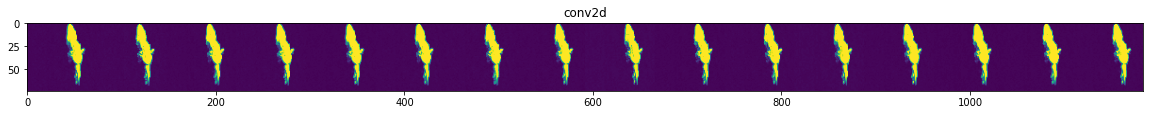

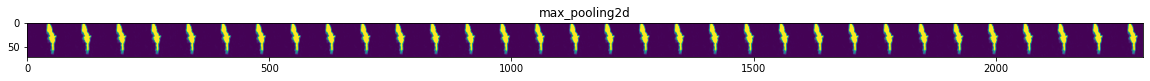

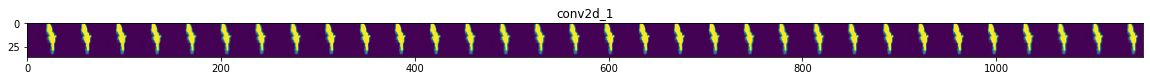

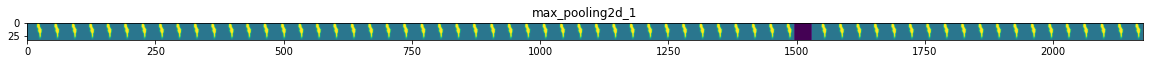

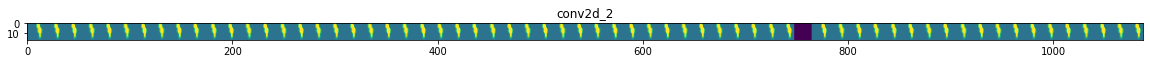

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
back_img_files = [os.path.join(train_back_dir, f) for f in train_back_hames]
front_img_files = [os.path.join(train_front_dir, f) for f in train_front_hames]
img_path = random.choice(back_img_files + front_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# TESTING CODE